As a part of Data Analysis Nanodegree Udacity Project,I will do the data analysis on the Titanic Data orginally obtained from the Kaggle website.
Titanic Data - Contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic.
I shall try to find out the factors that made the survival chances better for the passengers. 
The three major questions in my analysis are:
1)If women and children were actually given preference?
2)Was the preference also given on the basis of class(1 being the top class with the maximum fare?
3)Were men of 1st class was given more preference than women of lower classes?
4)Was the survival rate of families better than people who were travelling alone?

For my investigation, I shall use numpy, pandas, matplotlib and seaborn. So the first step would be to import those libraries.

In [72]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for all graphs
sns.set(style="whitegrid")

# Render plots inline
%matplotlib inline

The below two steps are 1)Read the file and 2)check whether the right file has been loaded successfully.

In [73]:
# Read in the dataset, create dataframe
Titanic_df = pd.read_csv('train.csv')

In [74]:
# Print the first few records to review data and format: 
Titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In the first glance, I can see that Cabin has 3 NaN values. I will try to find out the number of NaNs for each column.

In [75]:
# Calculate number of missing values
Titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Cabin has 687 missing values and Age has 177. Since I don't see much use of the cabin column, I will just ignore it and for column Age, I shall change the NaN values of age with the median value.

In [76]:
#Change the NaN values of age with the median value of age.
Titanic_df['Age'].fillna(Titanic_df['Age'].median(), inplace=True)

I just want to check if I was successful in replacing all the NaN values from age column. So I shall run the query again.

In [77]:
# Calculate number of missing values again to check 'Age'column
Titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

DataFrame.describe(percentiles=None, include=None, exclude=None)[source]
Generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.
Analyzes both numeric and object series, as well as DataFrame column sets of mixed data types.(Taken from google)

In [78]:
# To generate descriptive statistics, excluding NaN values.To know a little more about data.
Titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Now I shall find out how many people actually survived.

In [79]:
#To find out how many people actually survived.
Count_who_survived = Titanic_df['Survived'].value_counts()

print(Count_who_survived)

0    549
1    342
Name: Survived, dtype: int64


For my first question, I shall try to find out if out of 342 survivors, male survivors were actually less in number.

In [80]:
#To find out how many males actually survived.
Males_who_suvived =  Titanic_df['Survived'][Titanic_df["Sex"]== 'male'].value_counts()
print(Males_who_suvived)

0    468
1    109
Name: Survived, dtype: int64


In [81]:
#To find out how many females actually survived.
Females_who_suvived =  Titanic_df['Survived'][Titanic_df["Sex"]== 'female'].value_counts()
print(Females_who_suvived)

1    233
0     81
Name: Survived, dtype: int64


It is evident that out of 342 survivors, 233 were females so they were given preference.
Now, to check if children were given preference. I will create a variable "Child" in dataframe. I shall split passengers into 3 categories (male of female if considered adult, and child if below 21 of age).

In [82]:
#To create a variable "Child" in dataframe. 
#The function will return child if age is below 21 and if age exceeds 21, the function will return the sex of the passenger.  

def Agedecider(passenger):
    age, sex = passenger

    if age < 21:
        return "child"
    else:
        return sex

# adds new column to dataframe that distinguishes a passenger as a child or an adult
Titanic_df['PersonStatus'] = Titanic_df[['Age', 'Sex']].apply(Agedecider, axis=1)


In [83]:
# To get counts of unique values in The column PersonStatus(male,feamle,child)
Titanic_df['PersonStatus'].value_counts()

male      474
female    237
child     180
Name: PersonStatus, dtype: int64

In [84]:
#Checking a few columns to ensure that Personstatus is correct according to the criterion.
Titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PersonStatus
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


In [85]:
# To find out the number of children who survived
Children_who_suvived =  Titanic_df['Survived'][Titanic_df["PersonStatus"]== 'child'].value_counts()
print(Children_who_suvived)

0    98
1    82
Name: Survived, dtype: int64


I already almost have the answer to my first question. I shall use the graph to finally come to the conclusion that women and children were actually given preference to men in any class.

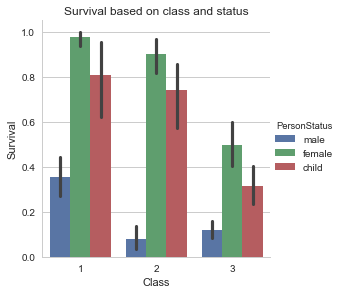

In [86]:
#Hue variable should be used for the most important comparisons, in my case, PersonStatus.
#To plot the survival rate of all three Person Status in all 3 classes.

sns.factorplot('Pclass','Survived', hue = 'PersonStatus', data = Titanic_df, kind = 'bar')
plt.xlabel('Class')
plt.ylabel('Survival')
plt.title('Survival based on class and status')


As is evident from the graph, the survival rate for children and women combined was more than the rate of men in all the three classes.
To answer my second question, I shall now try to find out the survival rate based on classes alone.

In [87]:
#To find out the survival rate based on classes alone
Class_1_who_suvived =  Titanic_df['Survived'][Titanic_df["Pclass"]== 1].value_counts(normalize = True)
print(Class_1_who_suvived)
Class_2_who_suvived =  Titanic_df['Survived'][Titanic_df["Pclass"]== 2].value_counts(normalize = True)
print(Class_2_who_suvived)
Class_3_who_suvived =  Titanic_df['Survived'][Titanic_df["Pclass"]== 3].value_counts(normalize = True)
print(Class_3_who_suvived)

1    0.62963
0    0.37037
Name: Survived, dtype: float64
0    0.527174
1    0.472826
Name: Survived, dtype: float64
0    0.757637
1    0.242363
Name: Survived, dtype: float64


From the above results, it looks like class 1 and 2 were definitely given preference to class 3. To further substantiate the result, I shall draw a graph.
#It would be interesting to see if survival rate of women who were travelling in class 1 was 100%.


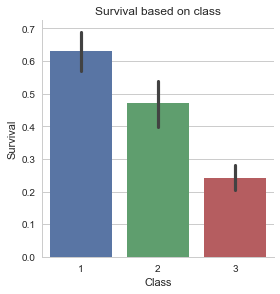

In [88]:
# To plot the graph between survival rate and the three classes
sns.factorplot('Pclass','Survived', data = Titanic_df, kind = 'bar')
plt.xlabel('Class')
plt.ylabel('Survival')
plt.title('Survival based on class')

As predicted, the survival rate did depend upon the class. First class was given preference after all. It would be interesting to find out whether the survival rate of women of first class was almost 100%

In [89]:
#To find out whether the survival rate of women of first class
Females_in_class_1 = Titanic_df[(Titanic_df["Sex"] == 'female') & (Titanic_df["Pclass"]== 1)]
print(Females_in_class_1.shape)
Females_in_class_1_who_survived = Titanic_df[(Titanic_df["Survived"] == 1) & (Titanic_df["Sex"] == 'female') & (Titanic_df["Pclass"]== 1)]
print(Females_in_class_1_who_survived.shape)


(94, 13)
(91, 13)


As expected, the survivale rate was almost 100% for women travelling in 1st class. To answer my third question, I will find out whether the survival rate of women travelling in third class was at least better than men travelling in 1st class?

In [90]:
#To find out whether the survival rate of women of third class
Females_in_class_3 = Titanic_df[(Titanic_df["Sex"] == 'female') & (Titanic_df["Pclass"]== 3)]
print(Females_in_class_3.shape)
Females_in_class_3_who_survived = Titanic_df[(Titanic_df["Survived"] == 1) & (Titanic_df["Sex"] == 'female') & (Titanic_df["Pclass"]== 3)]
print(Females_in_class_3_who_survived.shape)

(144, 13)
(72, 13)


In [91]:
#To find out whether the survival rate of men of first class
Males_in_class_1 = Titanic_df[(Titanic_df["Sex"] == 'male') & (Titanic_df["Pclass"]== 1)]
print(Males_in_class_1.shape)
Males_in_class_1_who_survived = Titanic_df[(Titanic_df["Survived"] == 1) & (Titanic_df["Sex"] == 'male') & (Titanic_df["Pclass"]== 1)]
print(Males_in_class_1_who_survived.shape)

(122, 13)
(45, 13)


It is good to see that survival rate of women was better than men.(and the class made no difference there). There was an easier way to do all this using the mean and groupby function.

In [92]:
#Everything at a glance by using mean and groupby functions
class_sex_grouping = Titanic_df.groupby(['Pclass','PersonStatus']).mean()
print(class_sex_grouping)

                     PassengerId  Survived        Age     SibSp     Parch  \
Pclass PersonStatus                                                         
1      child          500.380952  0.809524  14.900952  0.714286  1.095238   
       female         462.337500  0.975000  37.125000  0.550000  0.375000   
       male           454.000000  0.356522  40.595652  0.269565  0.208696   
2      child          417.257143  0.742857  10.695143  0.485714  0.800000   
       female         453.333333  0.900000  33.458333  0.483333  0.500000   
       male           452.269663  0.078652  34.775281  0.314607  0.134831   
3      child          436.862903  0.314516  12.886452  1.241935  0.685484   
       female         403.144330  0.494845  29.664948  0.711340  0.783505   
       male           453.144444  0.118519  30.583333  0.292593  0.118519   

                           Fare  
Pclass PersonStatus              
1      child         116.136705  
       female        105.328072  
       male     

In [93]:
# To find out all the details of the classes using groupby and mean.
class_grouping = Titanic_df.groupby(['Pclass']).mean()
print(class_grouping)

        PassengerId  Survived        Age     SibSp     Parch       Fare
Pclass                                                                 
1        461.597222  0.629630  36.812130  0.416667  0.356481  84.154687
2        445.956522  0.472826  29.765380  0.402174  0.380435  20.662183
3        439.154786  0.242363  25.932627  0.615071  0.393075  13.675550


In [94]:
# To find out all the details of the PersonStatus using groupby and mean.
sex_grouping = Titanic_df.groupby(['PersonStatus']).mean()
print(sex_grouping)

              PassengerId  Survived    Pclass        Age     SibSp     Parch  \
PersonStatus                                                                   
child          440.461111  0.455556  2.572222  12.695389  1.033333  0.755556   
female         435.831224  0.759494  2.071730  33.143460  0.599156  0.573840   
male           453.187764  0.168776  2.327004  33.799578  0.291139  0.143460   

                   Fare  
PersonStatus             
child         29.727501  
female        47.396695  
male          25.548486  


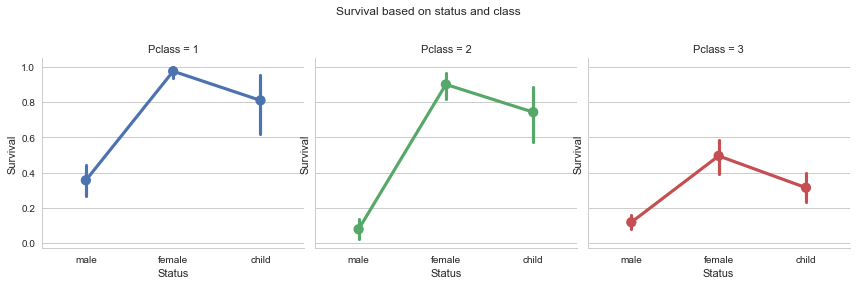

In [95]:
# To plot the graph between survived and the personstatus for all the three classes
g = sns.factorplot(x="PersonStatus", y="Survived", col="Pclass",
                  data=Titanic_df, hue ="Pclass")
g.set(xlabel='Status', ylabel='Survival')
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Survival based on status and class')




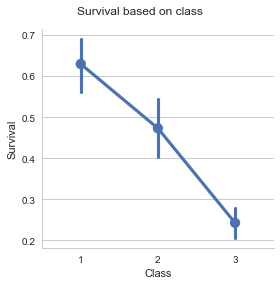

In [96]:
# To plot the graph between Survived and the three classes
g = sns.factorplot(x="Pclass", y="Survived", 
                  data=Titanic_df)
g.set(xlabel='Class', ylabel='Survival')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Survival based on class')



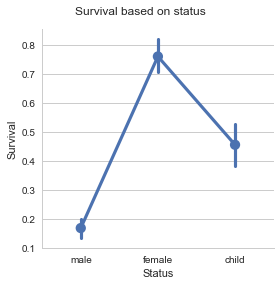

In [97]:
# To plot the graph between Survived and the three PersonStatus
g = sns.factorplot(x="PersonStatus", y="Survived", 
                  data=Titanic_df)
g.set(xlabel='Status', ylabel='Survival')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Survival based on status')


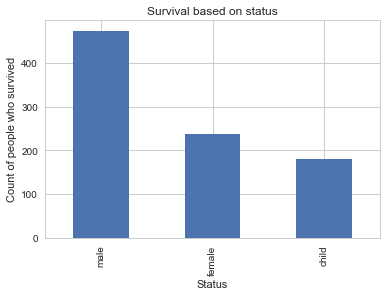

In [98]:
# To plot the graph of unique counts of male,female and child.
Titanic_df.PersonStatus.value_counts().plot(kind = 'bar')
plt.xlabel('Status')
plt.ylabel('Count of people who survived')
plt.title('Survival based on status')

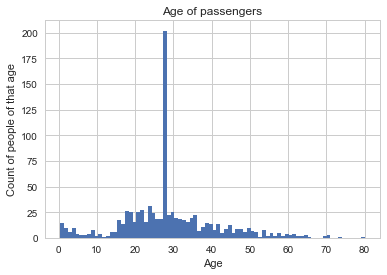

In [99]:
# To have a rough idea of the ages of passengers of Titanic
Titanic_df['Age'].hist(bins=80)
plt.xlabel('Age')
plt.ylabel('Count of people of that age')
plt.title('Age of passengers')


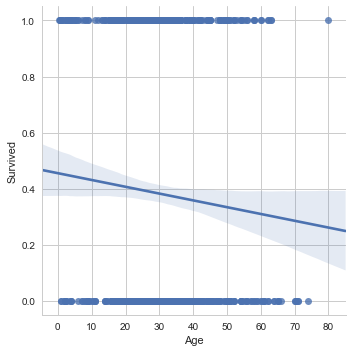

In [100]:
# To plot the survival according to the age
#lmplot is used  a convenient interface to fit regression models across conditional subsets of a dataset.
sns.lmplot('Age', 'Survived', data=Titanic_df)

In [101]:
# Adding Solo_or_Fam column

Titanic_df['Solo_or_Fam'] = Titanic_df.SibSp + Titanic_df.Parch 

In [102]:
# To determine if the passengere was travelling alone or with family.
# if count of the newly added colum was more than 0, then the function returns family else alone.

def Famdecider(count):
     
    
    if count > 0:
        return "Family"
    else:
        return "Alone"

# adds new column to dataframe that distinguishes a passenger as a child or an adult

Titanic_df['Solo_or_Family'] = Titanic_df['Solo_or_Fam'].apply(Famdecider)


In [103]:
# To ensure that the Solo_or_Family is added to the dataframe

Titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PersonStatus,Solo_or_Fam,Solo_or_Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,1,Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,1,Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,1,Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,0,Alone


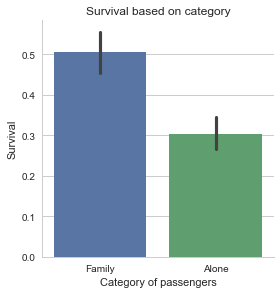

In [104]:
# To plot the graph between Survived and the two factors of Solo_or_Family column

sns.factorplot("Solo_or_Family", "Survived", data=Titanic_df, kind ="bar", size=4)
plt.xlabel('Category of passengers')
plt.ylabel('Survival')
plt.title('Survival based on category')


As expected, the survival rate for families was better than passengers travelling alone.

I shall also check if the embarkments also mattered in the decision of survivors.

In [105]:
#Everything at a glance for embarkments by using mean and groupby functions

Embarkment_grouping = Titanic_df.groupby(['Pclass','Embarked']).count()
print(Embarkment_grouping)
Embarkment_meangrouping = Titanic_df.groupby(['Pclass','Embarked']).mean()
print(Embarkment_meangrouping)

                 PassengerId  Survived  Name  Sex  Age  SibSp  Parch  Ticket  \
Pclass Embarked                                                                
1      C                  85        85    85   85   85     85     85      85   
       Q                   2         2     2    2    2      2      2       2   
       S                 127       127   127  127  127    127    127     127   
2      C                  17        17    17   17   17     17     17      17   
       Q                   3         3     3    3    3      3      3       3   
       S                 164       164   164  164  164    164    164     164   
3      C                  66        66    66   66   66     66     66      66   
       Q                  72        72    72   72   72     72     72      72   
       S                 353       353   353  353  353    353    353     353   

                 Fare  Cabin  PersonStatus  Solo_or_Fam  Solo_or_Family  
Pclass Embarked                              

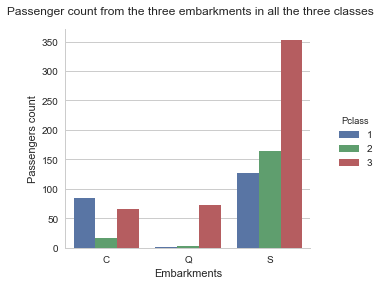

In [106]:
# To plot the graph between the count of passengers from the three embarkments for all the three classes
g = sns.factorplot('Embarked', order=['C','Q','S'], data=Titanic_df, hue='Pclass', kind='count', hue_order=[1,2,3])
g.set(xlabel='Embarkments', ylabel='Passengers count')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Passenger count from the three embarkments in all the three classes')

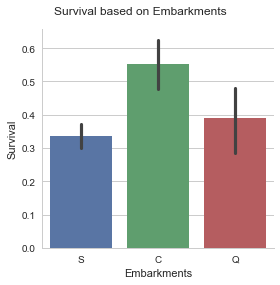

In [107]:
# To plot the graph between the survival rate and the three embarkments
g = sns.factorplot("Embarked", "Survived", data=Titanic_df, kind ="bar", size=4)
g.set(xlabel='Embarkments', ylabel='Survival')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Survival based on Embarkments')

It looks like C had maximum number of survivors. But it is also possible that C had maximum no of class 1 passengers. The below graph will clarify that.

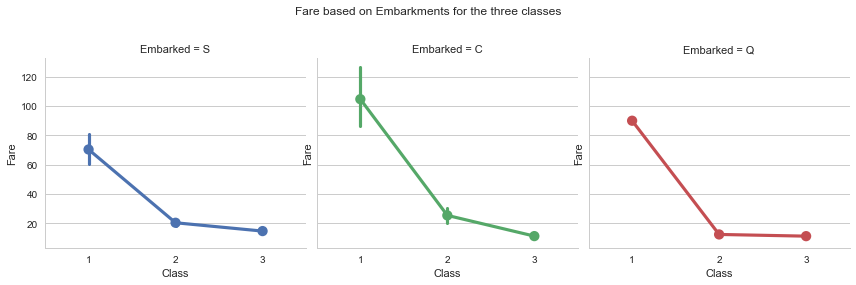

In [111]:
# To plot the graph between the fare of passengers for all the three classes for all the three embarkments 
g = sns.factorplot(x="Pclass", y="Fare", col="Embarked", data=Titanic_df, hue ="Embarked")
g.set(xlabel='Class', ylabel='Fare')
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Fare based on Embarkments for the three classes')




As I was hoping for, the embarkments did not matter. The results were more bacuse of the fact that Embarkment C had max no of 1st class passengers.

Conclusion: The project investigates the stated question(s) from multiple angles. At least three variables(Sex,Age,Class) were investigated using both single-variable (1d) and multiple-variable (2d) explorations.And those three were important factors.
The results indicate that class and sex were given prime importance, A women of 1st class had maximum chances of survival and a man of third class had the lowest. Age did not matter much. Women and children, across all classes, were given preference to men. Although there was no 100% guarantee of survival for anyone.
Issues:
The category of 'children' was assumed to be anyone under the age of 21.That could have also altered the results.Age data was missing and that could have skewed some numbers.
